In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from torchvision.datasets import MNIST
from torchvision import transforms
import matplotlib.pyplot as plt

In [12]:
class Binarize(object):
    def __call__(self, t):
        return (t > 0).float()

In [13]:
mnist_dataset = MNIST('./data', True, transform=transforms.Compose([
    transforms.RandomAffine(15, (0.2, 0.2)),
    transforms.ToTensor(),
    Binarize()

]), download=True)
mnist_dataloader = DataLoader(mnist_dataset, 64, True)

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
          1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,

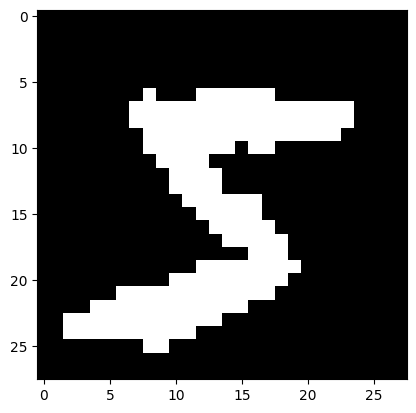

In [15]:
print(mnist_dataset[0][0])
plt.imshow(mnist_dataset[0][0].permute(1,2,0), cmap='gray')

In [ ]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 512),
    nn.ReLU(),

    nn.Linear(512, 256),
    nn.ReLU(),

    nn.Linear(256, 128),
    nn.ReLU(),

    nn.Linear(128, 32),
    nn.ReLU(),

    nn.Linear(32, 10),
)

In [8]:
optimizer = optim.Adam(model.parameters(), 0.001)
criterion = nn.CrossEntropyLoss()
epochs = 1000

losses = []

for epoch in range(epochs):
    avg_loss = 0
    for x, y in mnist_dataloader:
        y_pred = model(x)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        avg_loss += loss.item()
    
    avg_loss /= len(mnist_dataloader)
    print(f'Epoch {epoch}, avg_loss {avg_loss}') #1.33m -> 0.733

Epoch 0, avg_loss 0.3428076988757292
Epoch 1, avg_loss 0.30320149812617025
Epoch 2, avg_loss 0.27284932130181205
Epoch 3, avg_loss 0.25195182475851163
Epoch 4, avg_loss 0.23577010802336848
Epoch 5, avg_loss 0.22299378109512044
Epoch 6, avg_loss 0.2151296385295832
Epoch 7, avg_loss 0.20813811643084865
Epoch 8, avg_loss 0.1993211413711818
Epoch 9, avg_loss 0.19280439249472195
Epoch 10, avg_loss 0.18519622772368097
Epoch 11, avg_loss 0.17936733641079874
Epoch 12, avg_loss 0.17879868646873148
Epoch 13, avg_loss 0.1690519096941423
Epoch 14, avg_loss 0.1722284085027921
Epoch 15, avg_loss 0.16684641322887528
Epoch 16, avg_loss 0.16231890452473657
Epoch 17, avg_loss 0.15817253858343497
Epoch 18, avg_loss 0.15609073074562335
Epoch 19, avg_loss 0.1538155653647014
Epoch 20, avg_loss 0.1505516754346155
Epoch 21, avg_loss 0.14850268209341175
Epoch 22, avg_loss 0.14703328799067147
Epoch 23, avg_loss 0.1440525868846012
Epoch 24, avg_loss 0.14291751330325217
Epoch 25, avg_loss 0.14270777261849724
Epoc

KeyboardInterrupt: 

In [9]:
import json

def export_model_to_json(model, file_path):
    data = []
    for layer in model:
        if isinstance(layer, torch.nn.Linear):
            weights = layer.weight.detach().numpy().tolist()
            biases = layer.bias.detach().numpy().tolist()
            data.append({"weights": weights, "biases": biases})
    
    with open(file_path, "w") as f:
        json.dump(data, f)

export_model_to_json(model, "model_params.json")

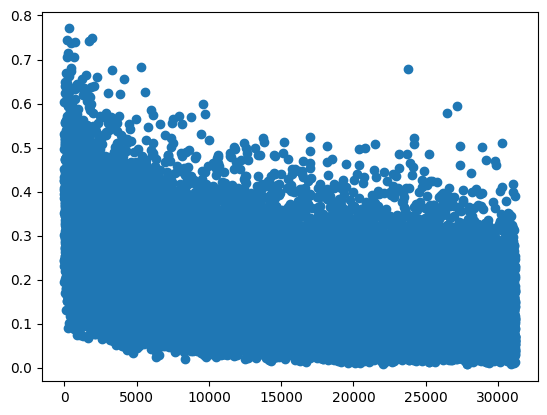

In [10]:
plt.plot(range(len(losses)), losses, 'o')